<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

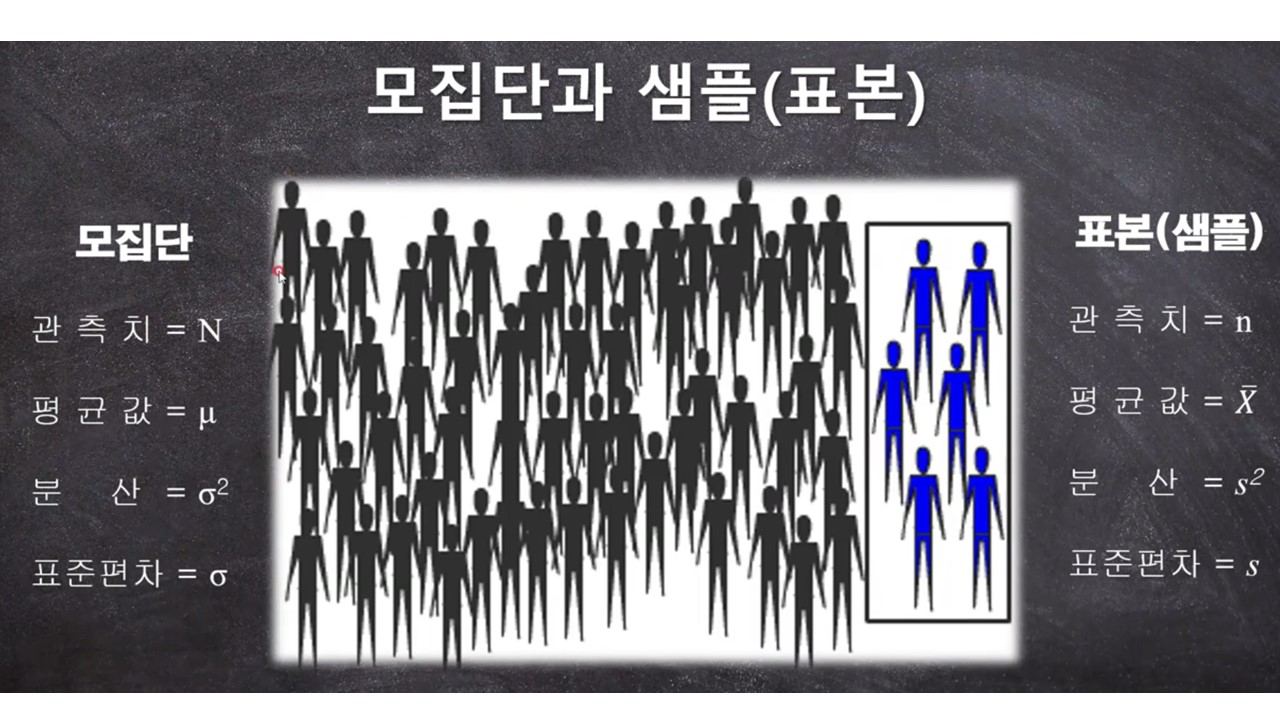

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
path = "./"

In [3]:
# 데이터 불러오기
ds_mycars = pd.read_csv(path+"mycars.csv")

In [ ]:
df = ds_mycars[['model','mpg']]
# 모델별 기술통계량 표시
df.groupby('model').describe()

**평균 검정_모집단 표준편차를 모르는 경우**

In [5]:
# 데이터 불러오기
df = pd.read_csv(path+"data_norm.csv")

In [6]:
# 정규성 검정
x=stats.shapiro(df)
print('The Shapiro-Wilkis Statistic is %.3f and the p-value is %.3f' %x)

The Shapiro-Wilkis Statistic is 0.933 and the p-value is 0.480


In [8]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-test ")
print("t검정통계량 : {} ".format(t))
print("p-value : {} ".format(p))

1-Sample t-test 
t검정통계량 : [0.864] 
p-value : [0.41] 


In [9]:
# 데이터 불러오기
df1 = pd.read_csv("data_sampt1.csv")
df2 = pd.read_csv("data_sampt2.csv")

In [ ]:
# 정규성 검정
x=stats.shapiro(df1)
print('Shapiro-Wilkis검정통계량은 %.3f, p-value는 %.3f' %x)

In [12]:
# 등분산성 검정
stat, p = stats.bartlett(df1['sample'],df2['sample'])
print('등분산검정결과 p-value는 %.3f' % p)

등분산검정결과 p-value는 0.642


In [13]:
# 2-Sample t-test
t_result = stats.ttest_ind(df1['sample'], df2['sample'], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [ ]:
print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

In [15]:
# 데이터 불러오기
df = pd.read_csv("data_pair.csv")

In [16]:
# paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [ ]:
print( "Paired t-test ")
print( " t검정통계량 : {} " .format(t))
print( " p-value : {} " .format(p))

**비율/분산 검정**

In [18]:
count = 15
nobs = 100
value = .1

# proportion test 실행
stat, pval = proportions_ztest(count, nobs, value)

In [ ]:
print( "1 Proportion test ")
print( ' p검정통계량 : {0:0.3f}' .format(stat))
print( ' p-value : {0:0.3f}'.format(pval))

결론: 결과적으로 전자제품 A에 대해 품질개선 결과 기존 대비 만족도의 차이가 있다고 할 수 없다.



In [20]:
count = np.array([4, 1])
nobs = np.array([1000, 1200])
# proportion test 실행

stat, pval = proportions_ztest(count, nobs)

In [ ]:
print( "2 Proportion test ")
print( "p검정통계량 : {0:0.3f}".format(stat))
print( "p-value : {0:0.3f}".format(pval))

분산 검정_Bartlett test

In [25]:
df = pd.read_csv(path+'data_var.csv')

In [ ]:
# 등분산성 검정
stats.bartlett(df['A'],df['B'])

결론: 유의수준 5%에서 검정결과 P값이 0.642이므로 고객간 고객 만족도의 분산은 차이가 없다.

**카이제곱 검정**

In [30]:
# 데이터 불러오기
df = pd.read_csv(path+"data_chi.csv", encoding = "euc-kr")
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

In [ ]:
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

결론: 공장별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.

**상관분석**

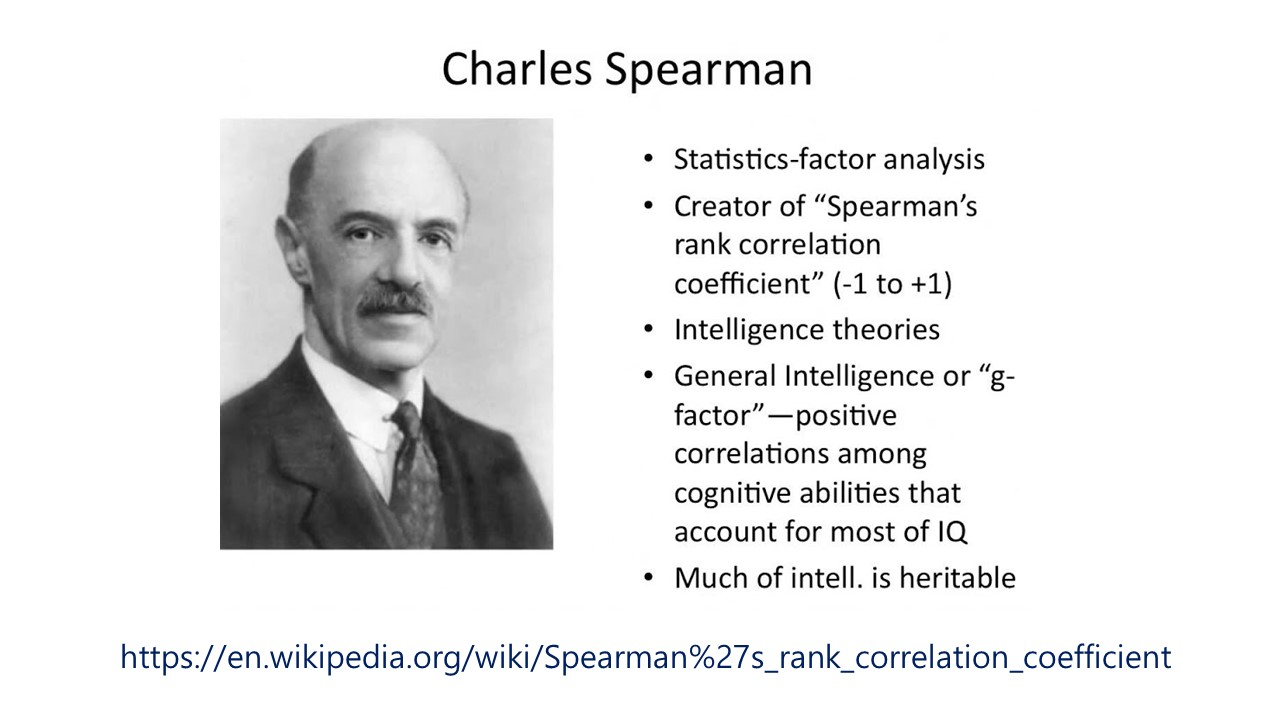

In [33]:
# 데이터 불러오기
df = pd.read_csv(path+"data_cor.csv")

# 상관분석 실행
corr, pval = stats.pearsonr(df['minutes'], df['units'])

In [ ]:
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p: {0:0.3f}'.format(pval))

결론: 부품 수리시간과 부품 가지수간에 매우 강한 상관성이 있다고 할 수 있다.
